In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import librosa

In [4]:
df = pd.read_csv("singfake.csv")

In [5]:
print(f"Number of unique singers: {len(df['Singer'].unique())}")
print(f"Number of unique languages: {len(df['Language'].unique())}")

Number of unique singers: 39
Number of unique languages: 12


### Train

In [6]:
training_data = df[df["Set"] == "Training"]

array(['bonafide', 'spoof'], dtype=object)

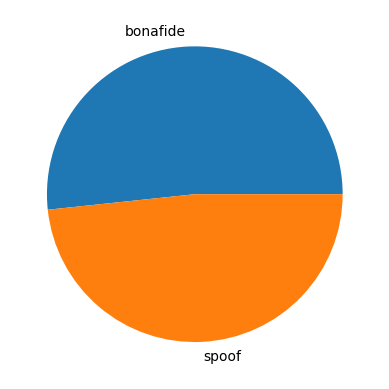

In [12]:
labels = training_data['Bonafide Or Spoof'].unique()
_ = plt.pie(training_data['Bonafide Or Spoof'].value_counts(), labels = labels,)

In [ ]:
len(training_data['Singer'].unique())

12

In [63]:
training_data['Model'].value_counts()

Model
unknown                                                                                                                                                   321
Sovits4.0                                                                                                                                                  51
sovits                                                                                                                                                     34
So-VITS-SVC 4.0                                                                                                                                            13
RVC                                                                                                                                                         9
DiffSinger                                                                                                                                                  7
https://github.com/svc-develop-team/so-vits-sv

#### Language

In [ ]:
training_data["Language"].value_counts()

Language
Mandarin             729
Cantonese             64
Japanese              44
English               19
Hokkien                5
Russian                2
Accented Mandarin      1
French                 1
Name: count, dtype: int64

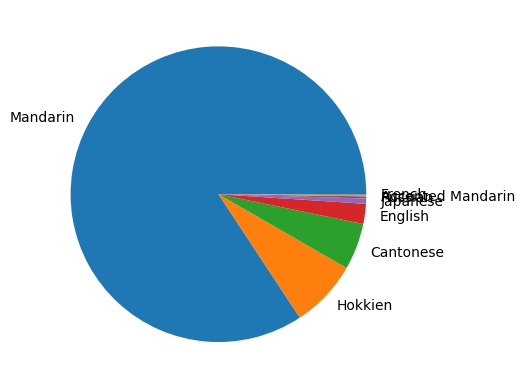

In [ ]:
labels = training_data["Language"].unique()
_ = plt.pie(training_data["Language"].value_counts(), labels = labels)

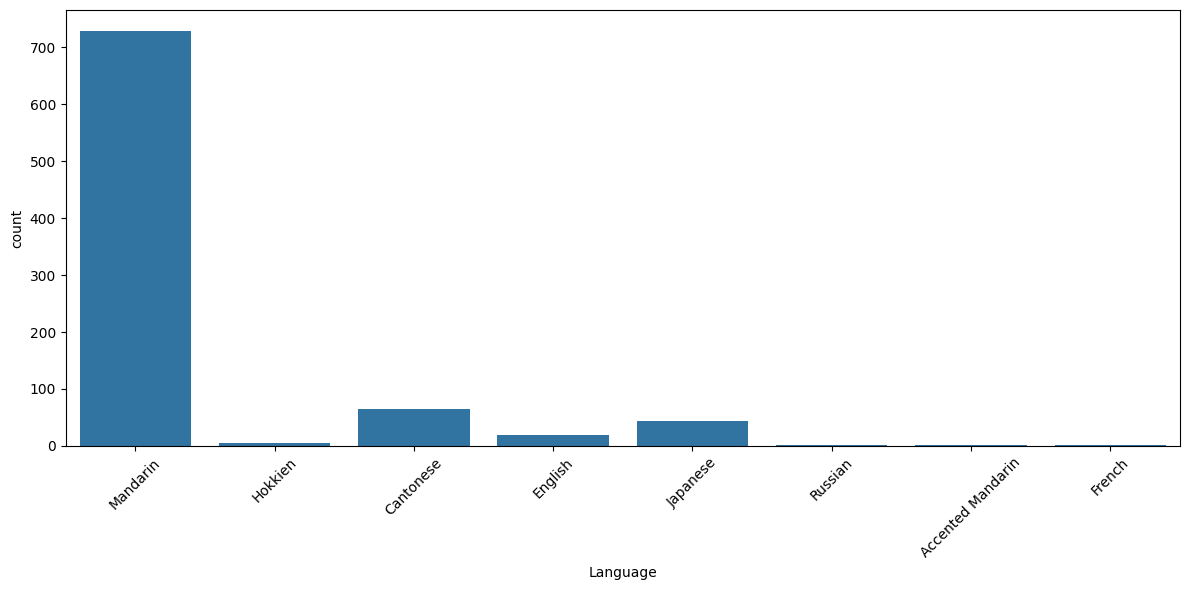

In [40]:
plt.figure(figsize=(12, 6))
sns.countplot(data=training_data, x="Language")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Singers

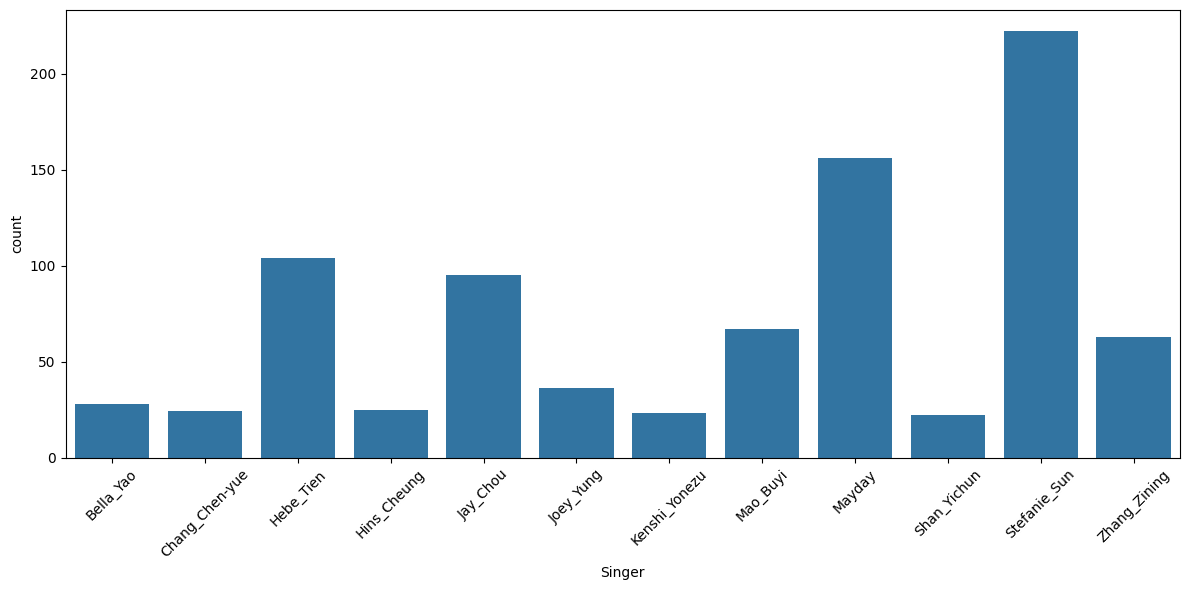

In [41]:
plt.figure(figsize=(12, 6))
sns.countplot(data=training_data, x="Singer")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

12 unikatowych piosenkarek

In [48]:
validation = df[df['Set'] == "Validation"]

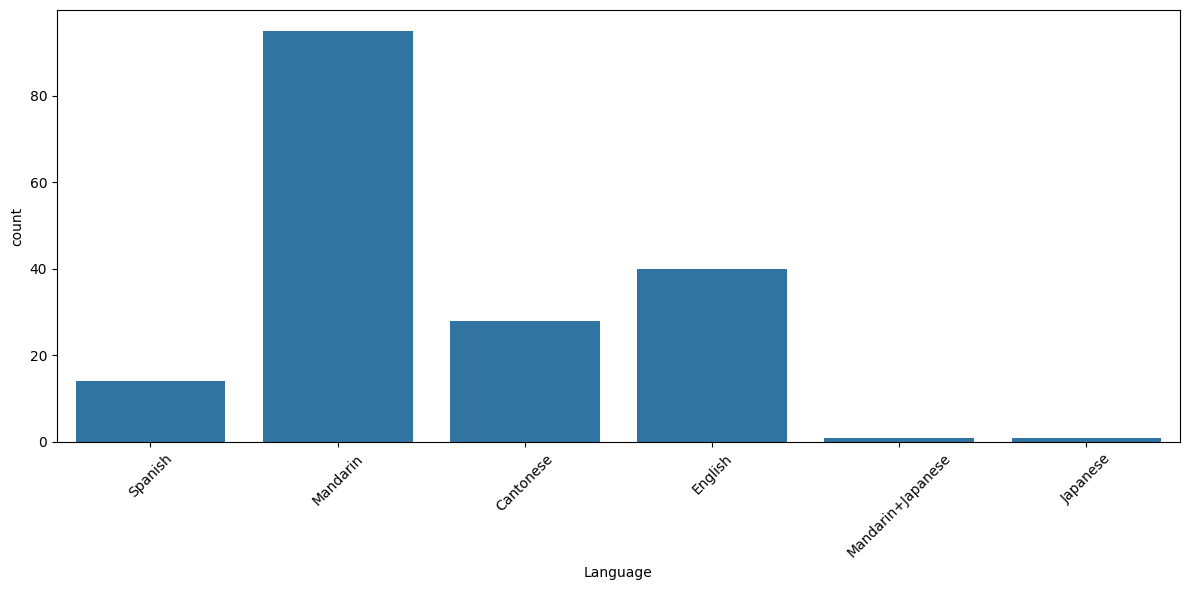

In [49]:
plt.figure(figsize=(12, 6))
sns.countplot(data=validation, x="Language")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Check demucs + vad pipeline

In [1]:
import os, sys
from tqdm import tqdm
import demucs.separate
from pyannote.audio import Model, Inference

In [ ]:
authtoken = "" 

model = Model.from_pretrained("pyannote/segmentation", use_auth_token=authtoken)

from pyannote.audio.pipelines import VoiceActivityDetection
pipeline = VoiceActivityDetection(segmentation=model)

pytorch_model.bin:   0%|          | 0.00/17.7M [00:00<?, ?B/s]

  2025-10-21T20:49:39.404454Z ERROR  Python exception updating progress:, error: PyErr { type: <class 'LookupError'>, value: LookupError(<ContextVar name='shell_parent' at 0x7f8088313970>), traceback: Some(<traceback object at 0x7f7e247bc1c0>) }, caller: "src/progress_update.rs:313"
    at /home/runner/work/xet-core/xet-core/error_printer/src/lib.rs:28



In [7]:
audio, sr = librosa.load("/mnt/data/kusnierz/audio-data/SingFake/downloads/Zhang_Zining_苏西的世界_bonafide.flac")

/tmp/ipykernel_1848681/391381152.py:1: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load("/mnt/data/kusnierz/audio-data/SingFake/downloads/Zhang_Zining_苏西的世界_bonafide.flac")
/mnt/data/kusnierz/audio-data/.venv/lib/python3.11/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [15]:
max_val = audio.shape[0]


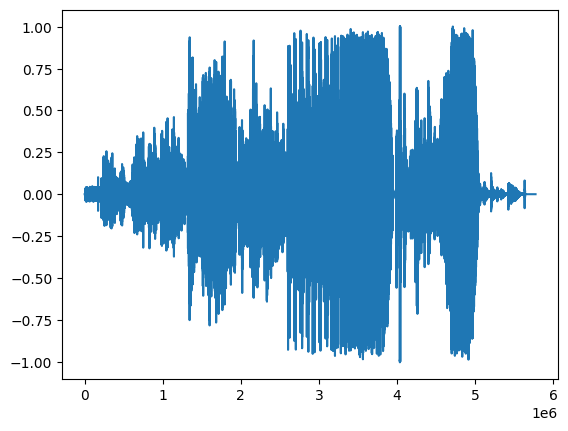

In [16]:
x = np.arange(max_val)
plt.plot(x, audio)

In [20]:
audio[20500:20550]

array([-4.93307132e-04, -6.03899546e-03, -9.21664201e-03, -1.14124641e-02,
       -1.30201420e-02, -1.48975477e-02, -1.76050067e-02, -1.99010130e-02,
       -1.95068493e-02, -1.77757461e-02, -1.73972491e-02, -1.68084390e-02,
       -1.65971257e-02, -1.28527945e-02, -8.19018856e-03, -3.40653257e-03,
       -2.48245895e-04,  1.22405030e-03,  1.47684477e-03, -1.54488254e-04,
       -6.54249452e-04, -3.81847844e-04,  8.01070128e-05, -1.81063300e-03,
       -3.04653030e-03, -4.47103102e-03, -6.23254571e-03, -8.49485770e-03,
       -1.04989894e-02, -1.23735899e-02, -1.55412750e-02, -1.72424149e-02,
       -1.82885416e-02, -1.82006340e-02, -1.85195561e-02, -1.75413117e-02,
       -1.40821096e-02, -7.56336097e-03, -1.93617959e-03,  1.16634043e-03,
        3.26063624e-03,  5.31926891e-03,  7.89484940e-03,  9.84646194e-03,
        1.24036018e-02,  1.40106967e-02,  1.43866614e-02,  1.23943193e-02,
        1.17009077e-02,  1.19786626e-02], dtype=float32)